# Experiment: Fit Binary Disengaged

**Goal**: Get binary model up and running with visuals and add in disengaged terms to see what their weights look like in a binary setting.

Related notebooks:

* `2024_03_22_EXP_compare_prev_disengageds_filt`
* `2024_03_23_compare_prev_disengaged_stim_intrxs`

> Written by Jess Breda 

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment

from multiglm.experiments.experiment_sigma_sweep import ExperimentSigmaSweep
from multiglm.experiments.experiment_tau_sweep import ExperimentTauSweep
from multiglm.experiments.experiment_compare_models import ExperimentCompareModels

from multiglm.features.design_matrix_generator import *
from multiglm.features.design_matrix_generator_PWM import *

from multiglm.models.binary_logistic_regression import BinaryLogisticRegression
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression

from multiglm.visualizations.model_visualizer import *

from multiglm.data import ANIMAL_IDS
from multiglm.experiments import STANDARD_SIGMAS


sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

### Sigma Sweep



In [2]:
# design matrix columns
dmg_config = {
    "session": lambda df: (copy(df.session)),
    "bias": lambda df: (add_bias_column(df)),
    "s_a": lambda df: (standardize(df.s_a)),
    "s_a_x_filt_prev_viol": lambda df: (
        stim_filt_viol_intrx(df, "s_a", get_animals_tau(df, "prev_violation"))
    ),
    "s_b": lambda df: (standardize(df.s_b)),
    "s_b_x_filt_prev_viol": lambda df: (
        stim_filt_viol_intrx(df, "s_b", get_animals_tau(df, "prev_violation"))
    ),
    "prev_avg_stim": lambda df: prev_avg_stim(df, mask_prev_violation=True),
    "prev_correct": lambda df: (prev_correct_side(df)),
    "prev_choice": lambda df: (prev_choice(df)),
    "prev_tns": lambda df: (prev_trial_not_started(df)),
    "prev_violation_filt": lambda df: (
        filtered_prev_viol(df, get_animals_tau(df, "prev_violation"))
    ),
    "labels": binary_choice_labels(),
}

model_config = {
    "binary_w_disengaged": {
        "model_class": BinaryLogisticRegression,
        "dmg_config": dmg_config,
    },
}

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": STANDARD_SIGMAS,
    "random_state": 47,
    "eval_train": True,
    "model_config": model_config,
}

save_name = "2024_03_25_fit_binary_disengaged.pkl"

# ORDER = ["feature order here"]

## Run

In [3]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<

 ***** evaluating model binary_w_disengaged w/ sigma 0.07 *****
         Current function value: 31965.137309
         Iterations: 11
         Function evaluations: 80
         Gradient evaluations: 68

 ***** evaluating model binary_w_disengaged w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 32341.675726
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 26

 ***** evaluating model binary_w_disengaged w/ sigma 0.25 *****
         Current function value: 32476.884490
         Iterations: 21
         Function evaluations: 66
         Gradient evaluations: 54

 ***** evaluating model binary_w_disengaged w/ sigma 0.5 *****
         Current function value: 32015.032042
      

## Visualize

In [4]:
# experiment = load_experiment(save_name)
palette = "rocket"
mv = ModelVisualizer(experiment)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


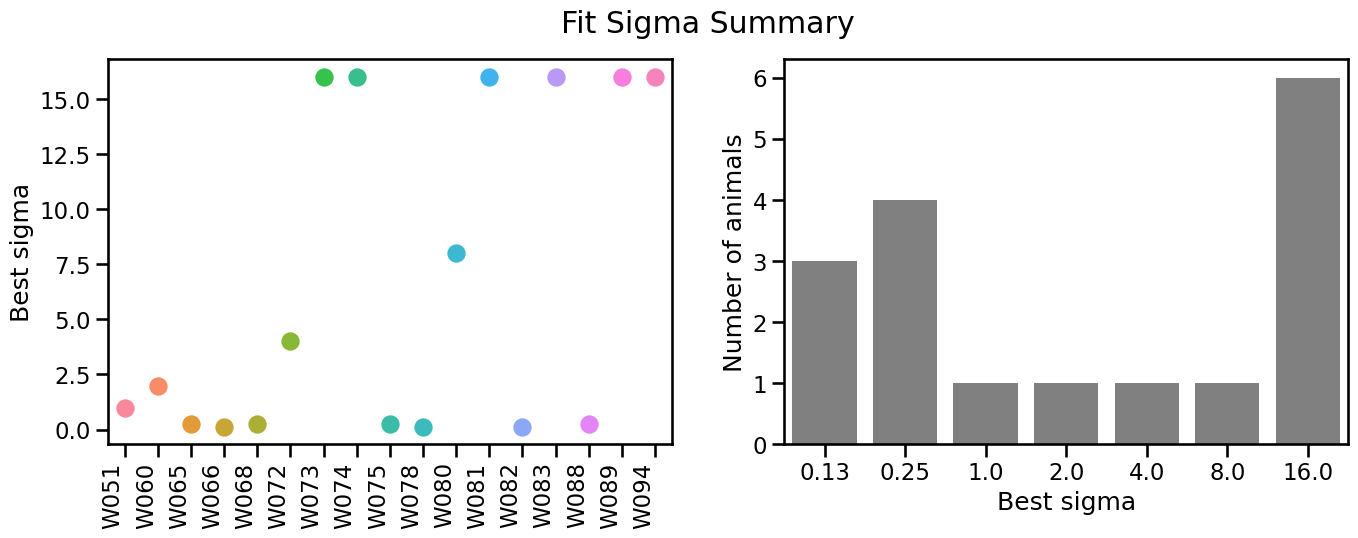

In [5]:
mv.plot_sigma_summary()

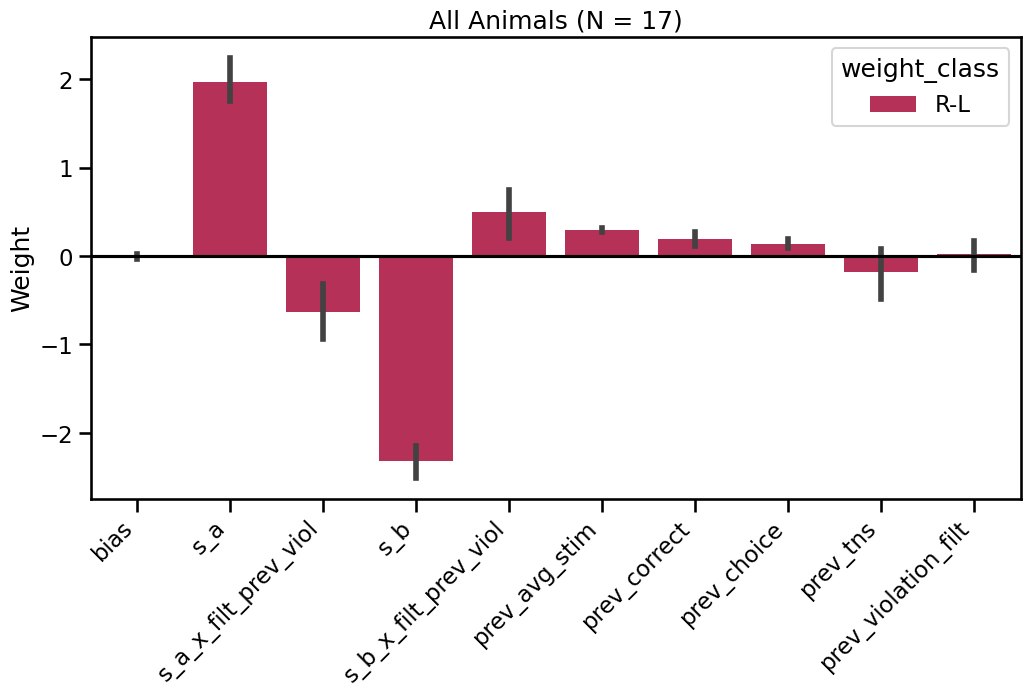

In [6]:
mv.plot_weights_summary(palette=palette)

/Users/jessbreda/Desktop/github/animal-learning/src/multiglm/visualizations/model_visualizer.py:206: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["is_min"] = df.groupby("animal_id")["nll"].transform(lambda x: x == x.min())
/Users/jessbreda/Desktop/github/animal-learning/src/multiglm/visualizations/model_visualizer.py:211: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for idx, (animal_id, sub_df) in enumerate(df.groupby("animal_id")):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futur

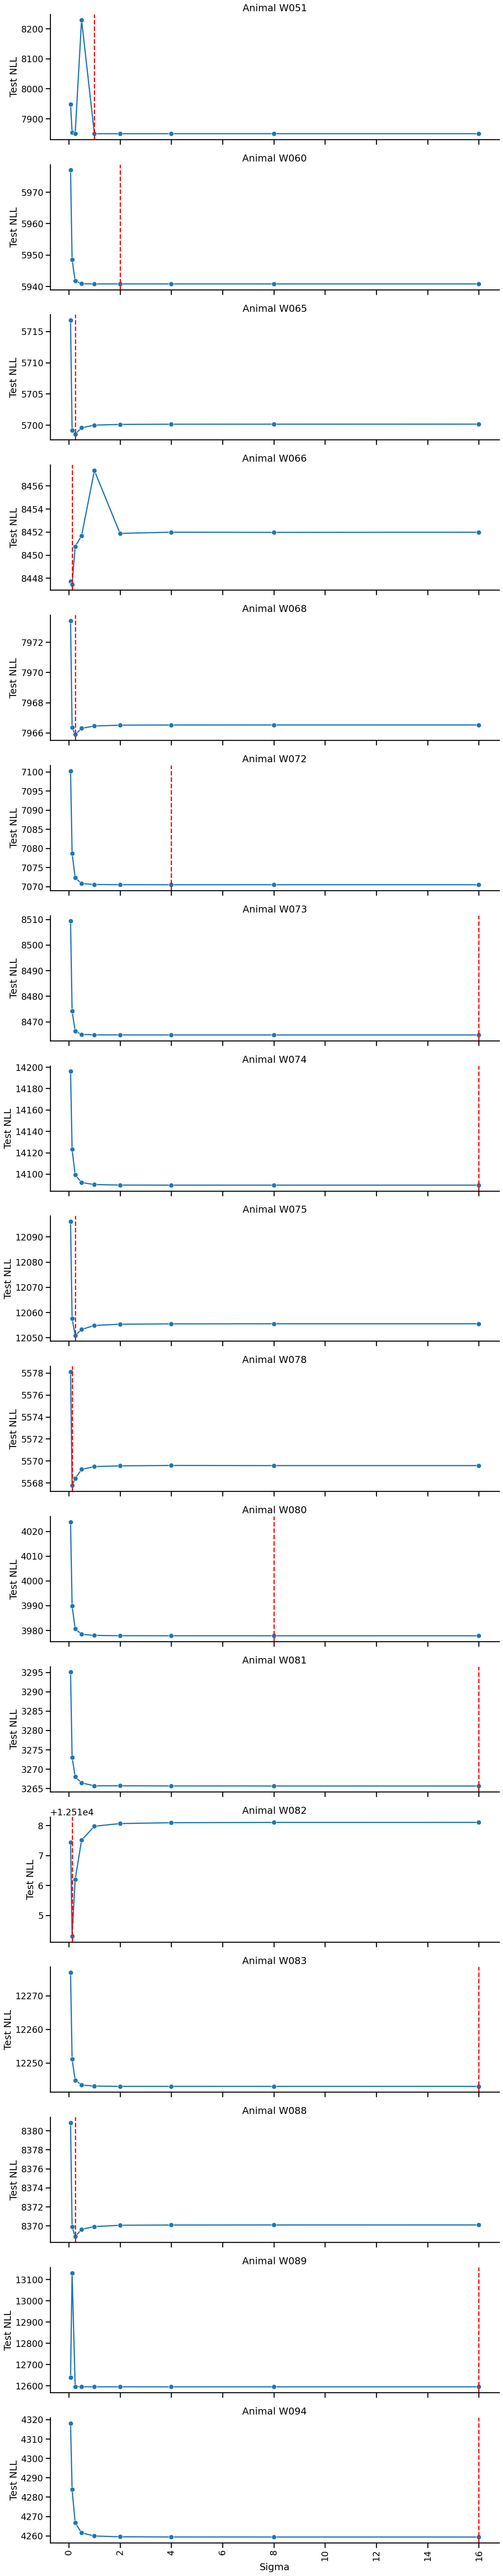

In [7]:
mv.plot_nll_over_sigmas_by_animal()

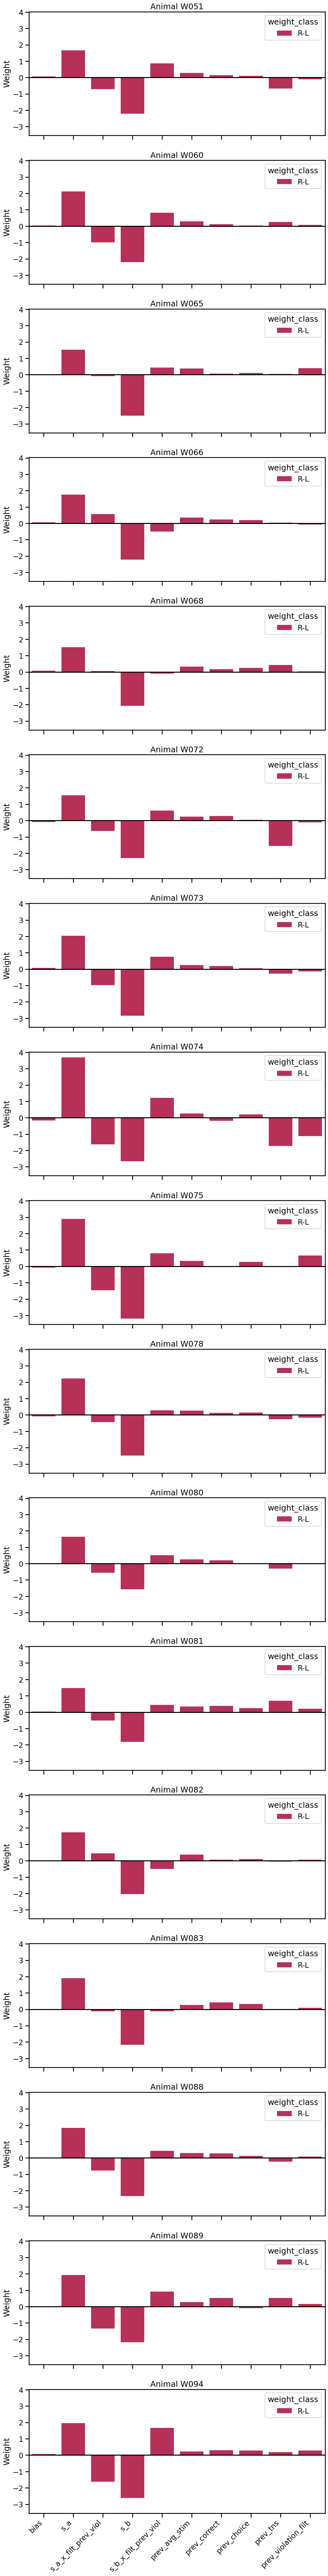

In [8]:
mv.plot_weights_by_animal(palette=palette)